# **Analyzing a dataset and building a prediction model in PySpark**
**By Getrude Shabiha**

In [0]:
from pyspark.sql import SQLContext
from pyspark import SparkContext


# Create SQLContext
sqlContext = SQLContext(sc)

# Execute SQL query to select all columns from obesity_data table
obesity_data = sqlContext.sql("SELECT * FROM obesity_data")

# Show the first few rows of the DataFrame
obesity_data.show(5)


+----+------+------+------+----------+----+----+---+---+-----+----+------------------------------+---+---+---------+--------------------+-------------------+
| Age|Gender|Height|Weight|      CALC|FAVC|FCVC|NCP|SCC|SMOKE|CH2O|family_history_with_overweight|FAF|TUE|     CAEC|              MTRANS|         NObeyesdad|
+----+------+------+------+----------+----+----+---+---+-----+----+------------------------------+---+---+---------+--------------------+-------------------+
|21.0|Female|  1.62|  64.0|        no|  no| 2.0|3.0| no|   no| 2.0|                           yes|0.0|1.0|Sometimes|Public_Transporta...|      Normal_Weight|
|21.0|Female|  1.52|  56.0| Sometimes|  no| 3.0|3.0|yes|  yes| 3.0|                           yes|3.0|0.0|Sometimes|Public_Transporta...|      Normal_Weight|
|23.0|  Male|   1.8|  77.0|Frequently|  no| 2.0|3.0| no|   no| 2.0|                           yes|2.0|1.0|Sometimes|Public_Transporta...|      Normal_Weight|
|27.0|  Male|   1.8|  87.0|Frequently|  no| 3.0|3.0|

In [0]:
# Get the number of rows
num_rows = obesity_data.count()

# Get the list of column names
columns = obesity_data.columns

# Display the shape of the dataset
print("Shape of the dataset: {} rows, {} columns".format(num_rows, len(columns)))


Shape of the dataset: 2111 rows, 17 columns


In [0]:
from pyspark.sql.functions import col

# Define a function to count null values in each column
def count_null(df, col_name):
    return df.where(col(col_name).isNull()).count()

# Create a dictionary to store the null counts for each column
null_counts = {}

# Iterate through each column and count null values
for col_name in obesity_data.columns:
    null_counts[col_name] = count_null(obesity_data, col_name)

# Display the number of null values in each column
for col_name, count in null_counts.items():
    print("{}: {}".format(col_name, count))


Age: 0
Gender: 0
Height: 0
Weight: 0
CALC: 0
FAVC: 0
FCVC: 0
NCP: 0
SCC: 0
SMOKE: 0
CH2O: 0
family_history_with_overweight: 0
FAF: 0
TUE: 0
CAEC: 0
MTRANS: 0
NObeyesdad: 0


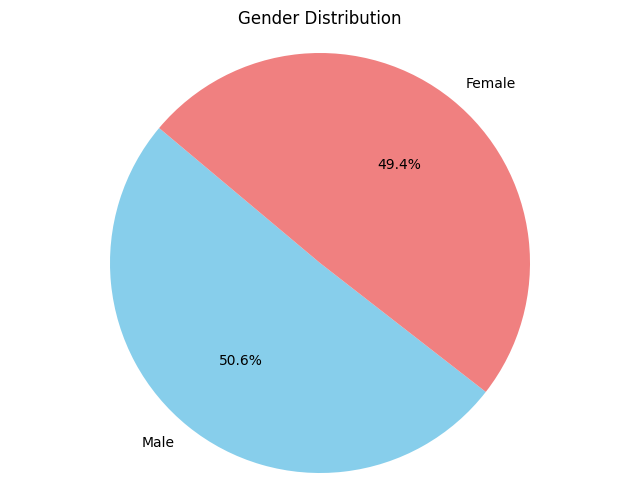

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas DataFrame
obesity_data_pd = obesity_data.toPandas()

# Calculating the frequency of each gender category
gender_counts = obesity_data_pd['Gender'].value_counts()

# Creating a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


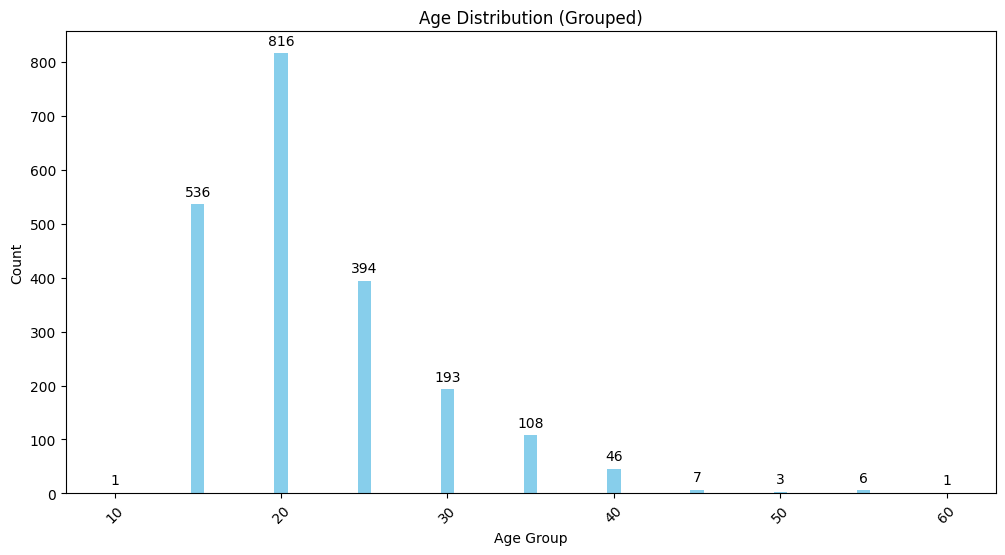

In [0]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Define the age brackets
age_brackets = [5,10,15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105]

# Create age groups
obesity_data = obesity_data.withColumn("Age Group", F.when(F.col("Age").isNull(), None)
                              .otherwise(F.floor(F.col("Age") / 5) * 5))

# Count individuals in each age group
age_group_counts = obesity_data.groupBy("Age Group").count().orderBy("Age Group").collect()

# Convert the result to a dictionary for plotting
age_group_dict = {row["Age Group"]: row["count"] for row in age_group_counts}

# Create lists for plotting
age_groups = [age_group[0] for age_group in age_group_dict.items()]
counts = [age_group[1] for age_group in age_group_dict.items()]

# Creating a bar chart for age distribution
plt.figure(figsize=(12, 6))
plt.bar(age_groups, counts, color='skyblue')

# Adding the count labels on top of each bar
for i, count in enumerate(counts):
    plt.text(age_groups[i], count + 10, str(count), ha='center', va='bottom')

plt.title('Age Distribution (Grouped)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


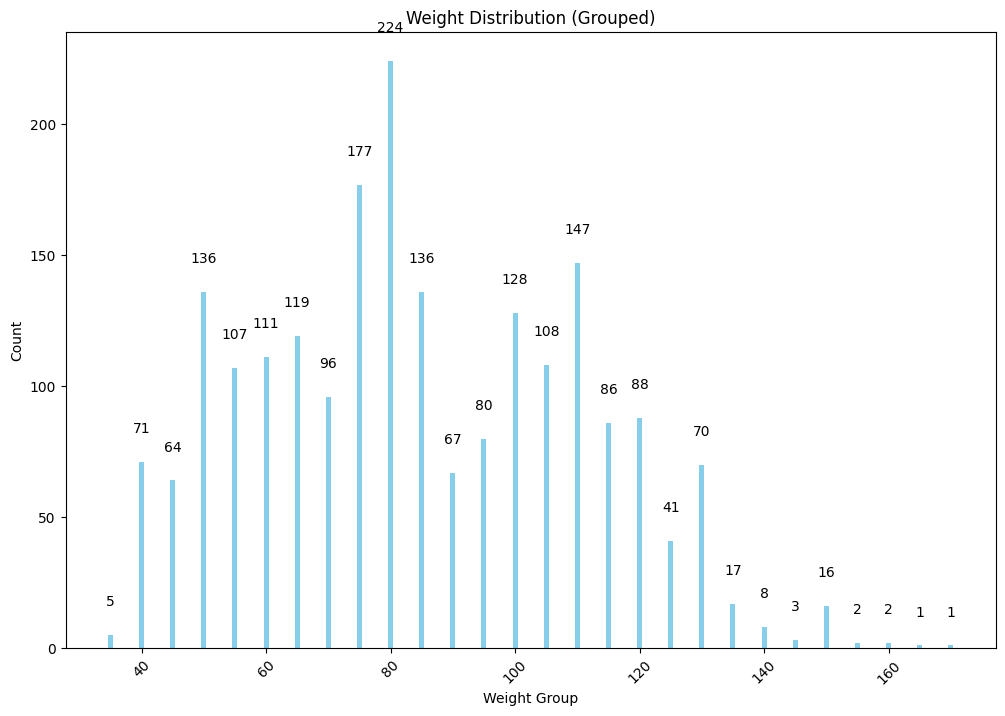

In [0]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import when

# Define the weight brackets
weight_brackets = [30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175]

# Create weight groups
obesity_data = obesity_data.withColumn("Weight Group", when(obesity_data.Weight.isNull(), None)
                                        .otherwise(F.floor(obesity_data.Weight / 5) * 5))

# Count individuals in each weight group
weight_group_counts = obesity_data.groupBy("Weight Group").count().orderBy("Weight Group").collect()

# Convert the result to a dictionary for plotting
weight_group_dict = {row["Weight Group"]: row["count"] for row in weight_group_counts}

# Create lists for plotting
weight_groups = [weight_group[0] for weight_group in weight_group_dict.items()]
counts = [weight_group[1] for weight_group in weight_group_dict.items()]

# Creating a bar chart for weight distribution
plt.figure(figsize=(12, 8))
plt.bar(weight_groups, counts, color='skyblue')

# Adding count labels on top of each bar
for i, count in enumerate(counts):
    plt.text(weight_groups[i], count + 10, str(count), ha='center', va='bottom')

plt.title('Weight Distribution (Grouped)')
plt.xlabel('Weight Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


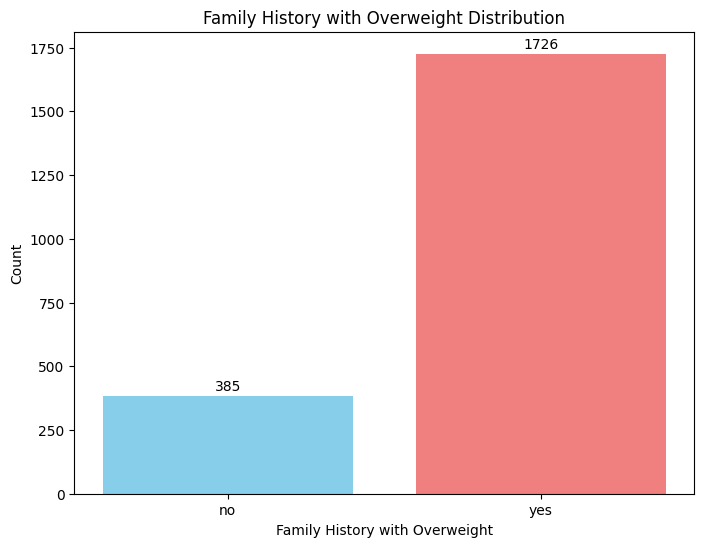

In [0]:
import matplotlib.pyplot as plt

# Counting the individuals with and without family history of overweight
family_history_counts = obesity_data.groupBy("family_history_with_overweight").count().orderBy("family_history_with_overweight").collect()

# Convert the result to a dictionary for plotting
family_history_dict = {row["family_history_with_overweight"]: row["count"] for row in family_history_counts}

# Create lists for plotting
categories = [category[0] for category in family_history_dict.items()]
counts = [category[1] for category in family_history_dict.items()]

# Creating a bar chart for family history distribution
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['skyblue', 'lightcoral'])

# Adding count labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.title('Family History with Overweight Distribution')
plt.xlabel('Family History with Overweight')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


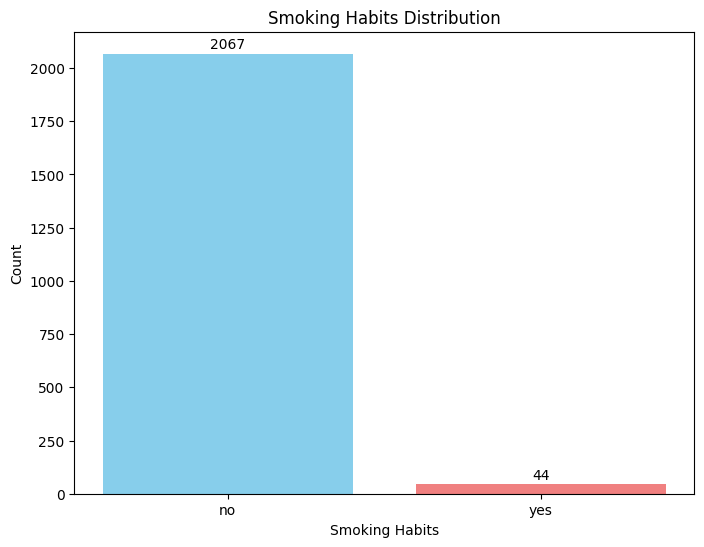

In [0]:
import matplotlib.pyplot as plt

# Counting individuals who smoke and who do not smoke
smoking_counts = obesity_data.groupBy("SMOKE").count().orderBy("SMOKE").collect()

# Convert the result to a dictionary for plotting
smoking_dict = {row["SMOKE"]: row["count"] for row in smoking_counts}

# Create lists for plotting
categories = [category[0] for category in smoking_dict.items()]
counts = [category[1] for category in smoking_dict.items()]

# Creating a bar chart for smoking distribution
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['skyblue', 'lightcoral'])

# Adding count labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.title('Smoking Habits Distribution')
plt.xlabel('Smoking Habits')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


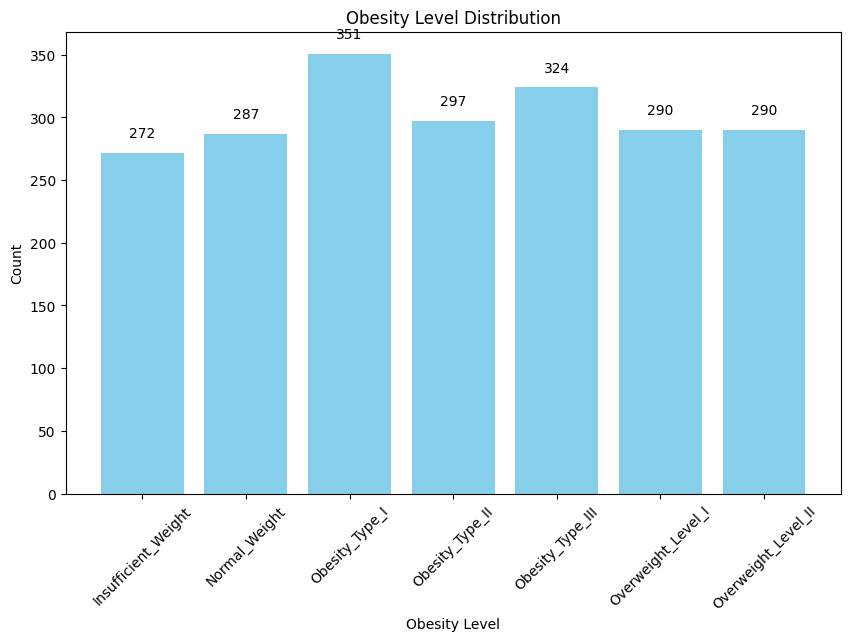

In [0]:
import matplotlib.pyplot as plt

# Counting individuals in each obesity level category
obesity_level_counts = obesity_data.groupBy("NObeyesdad").count().orderBy("NObeyesdad").collect()

# Convert the result to a dictionary for plotting
obesity_level_dict = {row["NObeyesdad"]: row["count"] for row in obesity_level_counts}

# Create lists for plotting
categories = [category[0] for category in obesity_level_dict.items()]
counts = [category[1] for category in obesity_level_dict.items()]

# Creating a bar chart for obesity level distribution
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color='skyblue')

# Adding count labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.title('Obesity Level Distribution')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



In [0]:
# Mapping gender to binary values
obesity_data_pd['Gender'] = obesity_data_pd['Gender'].map({'Male': 1, 'Female': 0})


# Encoding CALC based on frequency
obesity_data_pd['CALC'] = obesity_data_pd['CALC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})

# Encoding FAVC as binary (1 for yes, 0 for no)
obesity_data_pd['FAVC'] = obesity_data_pd['FAVC'].map({'yes': 1, 'no': 0})

# Encoding FCVC as integer
obesity_data_pd['FCVC'] = obesity_data_pd['FCVC'].astype(int)

# Encoding NCP as integer
obesity_data_pd['NCP'] = obesity_data_pd['NCP'].astype(int)

# Encoding SCC as binary (1 for yes, 0 for no)
obesity_data_pd['SCC'] = obesity_data_pd['SCC'].map({'yes': 1, 'no': 0})

# Encoding SMOKE as binary (1 for yes, 0 for no)
obesity_data_pd['SMOKE'] = obesity_data_pd['SMOKE'].map({'yes': 1, 'no': 0})

# Encoding family_history_with_overweight as binary (1 for yes, 0 for no)
obesity_data_pd['family_history_with_overweight'] = obesity_data_pd['family_history_with_overweight'].map({'yes': 1, 'no': 0})

# Encoding FAF as integer
obesity_data_pd['FAF'] = obesity_data_pd['FAF'].astype(int)

# Encoding TUE as integer
obesity_data_pd['TUE'] = obesity_data_pd['TUE'].astype(int)

# Encoding CAEC based on frequency
caec_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
obesity_data_pd['CAEC'] = obesity_data_pd['CAEC'].map(caec_map)

# Encoding NObeyesdad 
obesity_data_pd['NObeyesdad'] = obesity_data_pd['NObeyesdad'].apply(lambda x: 0 if x == 'Normal_Weight' else 1)


# One-hot encoding MTRANS
obesity_data_pd = pd.get_dummies(obesity_data_pd, columns=['MTRANS'])

# Displaying the modified DataFrame
print(obesity_data_pd.head())


    Age  Gender  ...  MTRANS_Public_Transportation  MTRANS_Walking
0  21.0       0  ...                          True           False
1  21.0       0  ...                          True           False
2  23.0       1  ...                          True           False
3  27.0       1  ...                         False            True
4  22.0       1  ...                          True           False

[5 rows x 21 columns]


In [0]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target variable (y)
X = obesity_data_pd.drop(columns=['NObeyesdad'])  # Features
y = obesity_data_pd['NObeyesdad']  # Target variable

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (1688, 20) (1688,)
Testing set shape: (423, 20) (423,)


Logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#  logistic regression model
logreg_model = LogisticRegression(max_iter=20000)

# Train the model
logreg_model.fit(X_train, y_train)

# Predicting on the testing set
y_pred = logreg_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print necessary details
print("Logistic Regression Model Performance:")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_rep)


Logistic Regression Model Performance:
Accuracy: 0.8486997635933806

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.21      0.29        62
           1       0.88      0.96      0.92       361

    accuracy                           0.85       423
   macro avg       0.67      0.58      0.60       423
weighted avg       0.82      0.85      0.82       423



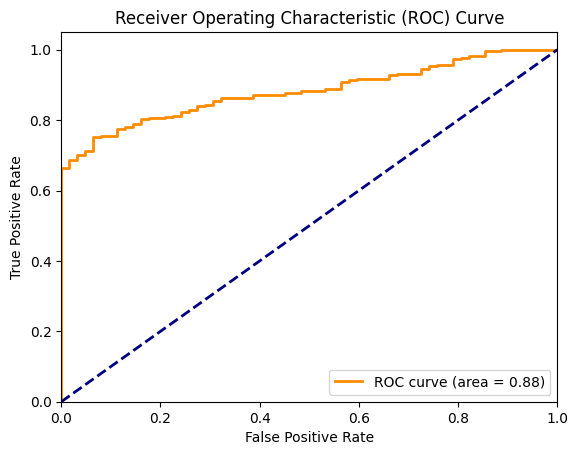

In [0]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, logreg_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

# decision tree classifier model
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train, y_train)

# Predicting on the testing set
y_pred_dt = dt_model.predict(X_test)

# Evaluate model performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Print necessary details
print("Decision Tree Classifier Model Performance:")
print("Accuracy:", accuracy_dt)
print("\nClassification Report:")
print(classification_rep_dt)


Decision Tree Classifier Model Performance:
Accuracy: 0.9361702127659575

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        62
           1       0.95      0.98      0.96       361

    accuracy                           0.94       423
   macro avg       0.89      0.84      0.86       423
weighted avg       0.93      0.94      0.93       423



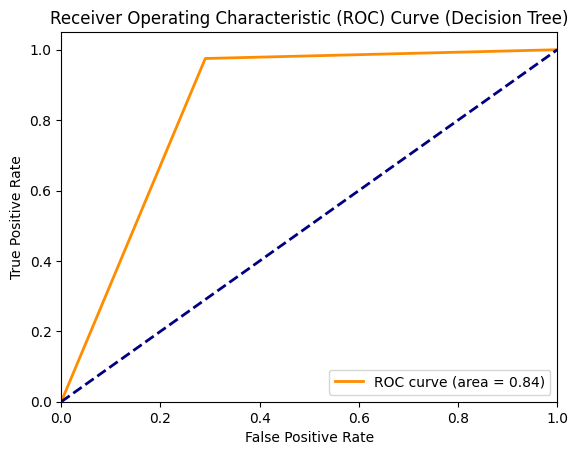

In [0]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Computing ROC curve and ROC area for each class
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plotting ROC curve
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Decision Tree)')
plt.legend(loc="lower right")
plt.show()


Random forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

# Initialize random forest classifier model
rf_model = RandomForestClassifier()

# Training the model
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print necessary details
print("Random Forest Classifier Model Performance:")
print("Accuracy:", accuracy_rf)
print("\nClassification Report:")
print(classification_rep_rf)


Random Forest Classifier Model Performance:
Accuracy: 0.9527186761229315

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        62
           1       0.96      0.98      0.97       361

    accuracy                           0.95       423
   macro avg       0.93      0.88      0.90       423
weighted avg       0.95      0.95      0.95       423



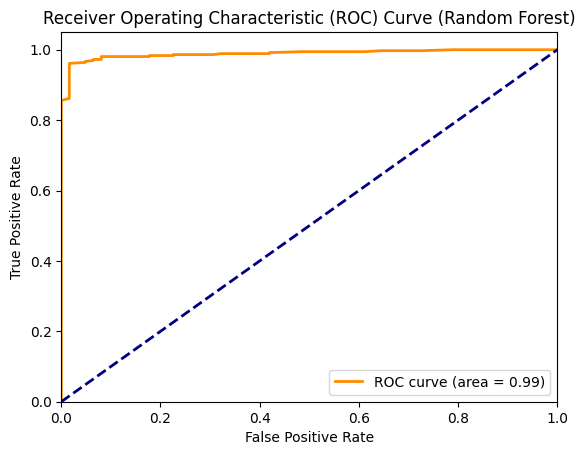

In [0]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest)')
plt.legend(loc="lower right")
plt.show()


Combined ROC Graphs for all models

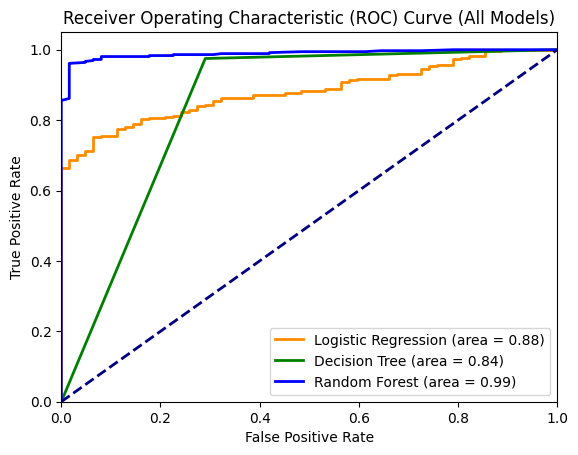

In [0]:
# combined ROC curve for all models
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree (area = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (All Models)')
plt.legend(loc="lower right")
plt.show()


Clustering models (K-means=2)

In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from sklearn.metrics import davies_bouldin_score
import numpy as np


obesity_data_spark = spark.createDataFrame(obesity_data_pd)

# Feature vectorization
feature_cols = obesity_data_spark.columns[:-1]  # since the last column is the target variable
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(obesity_data_spark)

# Creating a KMeans instance
kmeans = KMeans().setK(2).setSeed(42)

# Fiting the model to the data
model = kmeans.fit(data)

# Making predictions
predictions = model.transform(data)





# Collecting data from Spark RDD
features_rdd = data.select('features').rdd.map(lambda row: row[0])
predictions_rdd = predictions.select('prediction').rdd.map(lambda row: row[0])

# Convert Spark RDD to NumPy arrays
features_array = np.array(features_rdd.collect())
predictions_array = np.array(predictions_rdd.collect())



# Showing cluster centers
centers = model.clusterCenters()
print("Cluster Centers:")
for center in centers:
    print(center)




Cluster Centers:
[2.35731989e+01 4.44790047e-01 1.67499030e+00 6.88422372e+01
 6.63297045e-01 8.21150855e-01 2.11275272e+00 2.43157076e+00
 7.30948678e-02 1.94401244e-02 1.94309797e+00 7.04510109e-01
 8.45256610e-01 4.72783826e-01 1.21695179e+00 7.76827372e-01
 2.43390358e-01 4.66562986e-03 7.77604977e-03 7.05287714e-01]
[2.54651692e+01 6.01212121e-01 1.74327681e+00 1.14244911e+02
 8.37575758e-01 9.81818182e-01 2.36969697e+00 2.66666667e+00
 2.42424242e-03 2.30303030e-02 2.10919768e+00 9.93939394e-01
 5.62424242e-01 2.38787879e-01 1.02181818e+00 1.00000000e+00
 1.74545455e-01 1.21212121e-03 1.21212121e-03 8.15757576e-01]


Silhouette Score

In [0]:
# Evaluating clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

# Evaluate clustering performance
silhouette_score = evaluator.evaluate(predictions)
print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.7548960244223059


Davies-Bouldin Index

In [0]:
# Computing the Davies-Bouldin Index
dbi_score = davies_bouldin_score(features_array, predictions_array)
print("Davies-Bouldin Index:", dbi_score)

Davies-Bouldin Index: 0.5841330882962952
